In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')
%matplotlib inline
from sklearn.decomposition import PCA
import seaborn as sns 

In [5]:
data=pd.read_csv("telecom_churn.csv")
data["Churn"]=data["Churn"].astype("int64")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [6]:
data.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

In [4]:
datanum=data._get_numeric_data()

In [5]:
datacat=pd.concat([data.iloc[:,2:5], data.iloc[:,16],data.iloc[:,18]], axis=1)

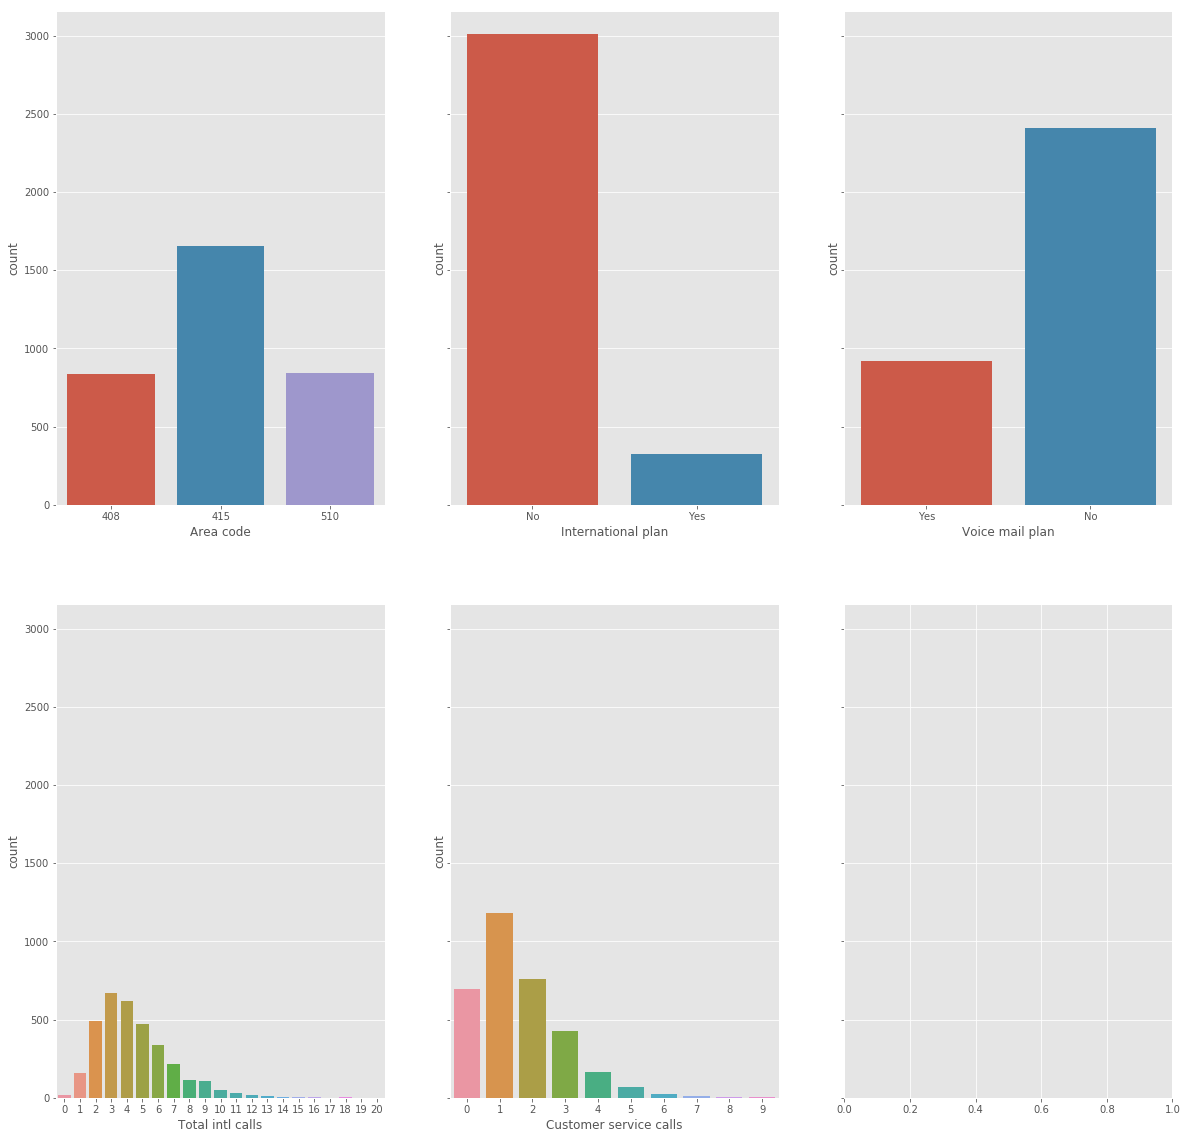

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(20, 20), sharey=True)
for i in np.arange(0,5,1):
    sns.countplot(x=datacat.columns[i], data=datacat, ax=axes[i / 3, i % 3])
plt.savefig("foo.png")

In [23]:
features = list(set(data.columns) - set(['State', 'International plan', 'Voice mail plan',  'Area code',
                                      'Total day charge',   'Total eve charge',   'Total night charge',
                                        'Total intl charge', 'Churn']))



In [8]:
features= list(set(datanum))
len(features)

17

No handlers could be found for logger "matplotlib.legend"


IndexError: index 4 is out of bounds for axis 0 with size 4

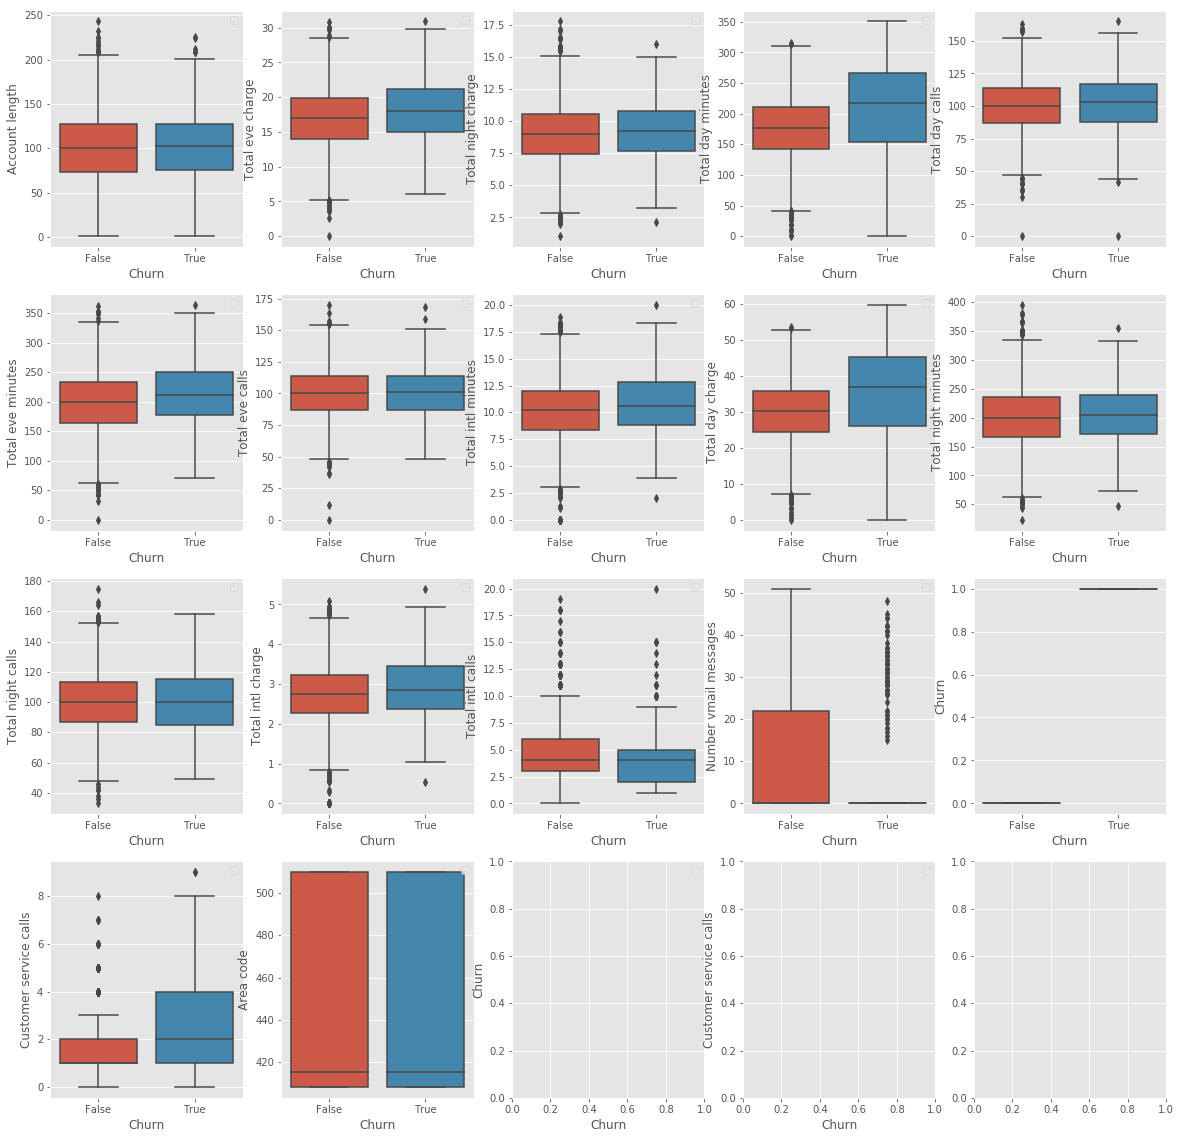

In [9]:

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 20))

for idx, feat in  enumerate(features):
    sns.boxplot(x='Churn', y=feat, data=data, ax=axes[idx / 5, idx % 5])
    axes[idx / 4, idx % 4].legend()
    axes[idx / 4, idx % 4].set_xlabel('Churn')
    axes[idx / 4, idx % 4].set_ylabel(feat);

/Users/danilakops/anaconda3/envs/py2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/danilakops/anaconda3/envs/py2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/danilakops/anaconda3/envs/py2/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/danilakops/anaconda3/envs/py2/lib/python2.7/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


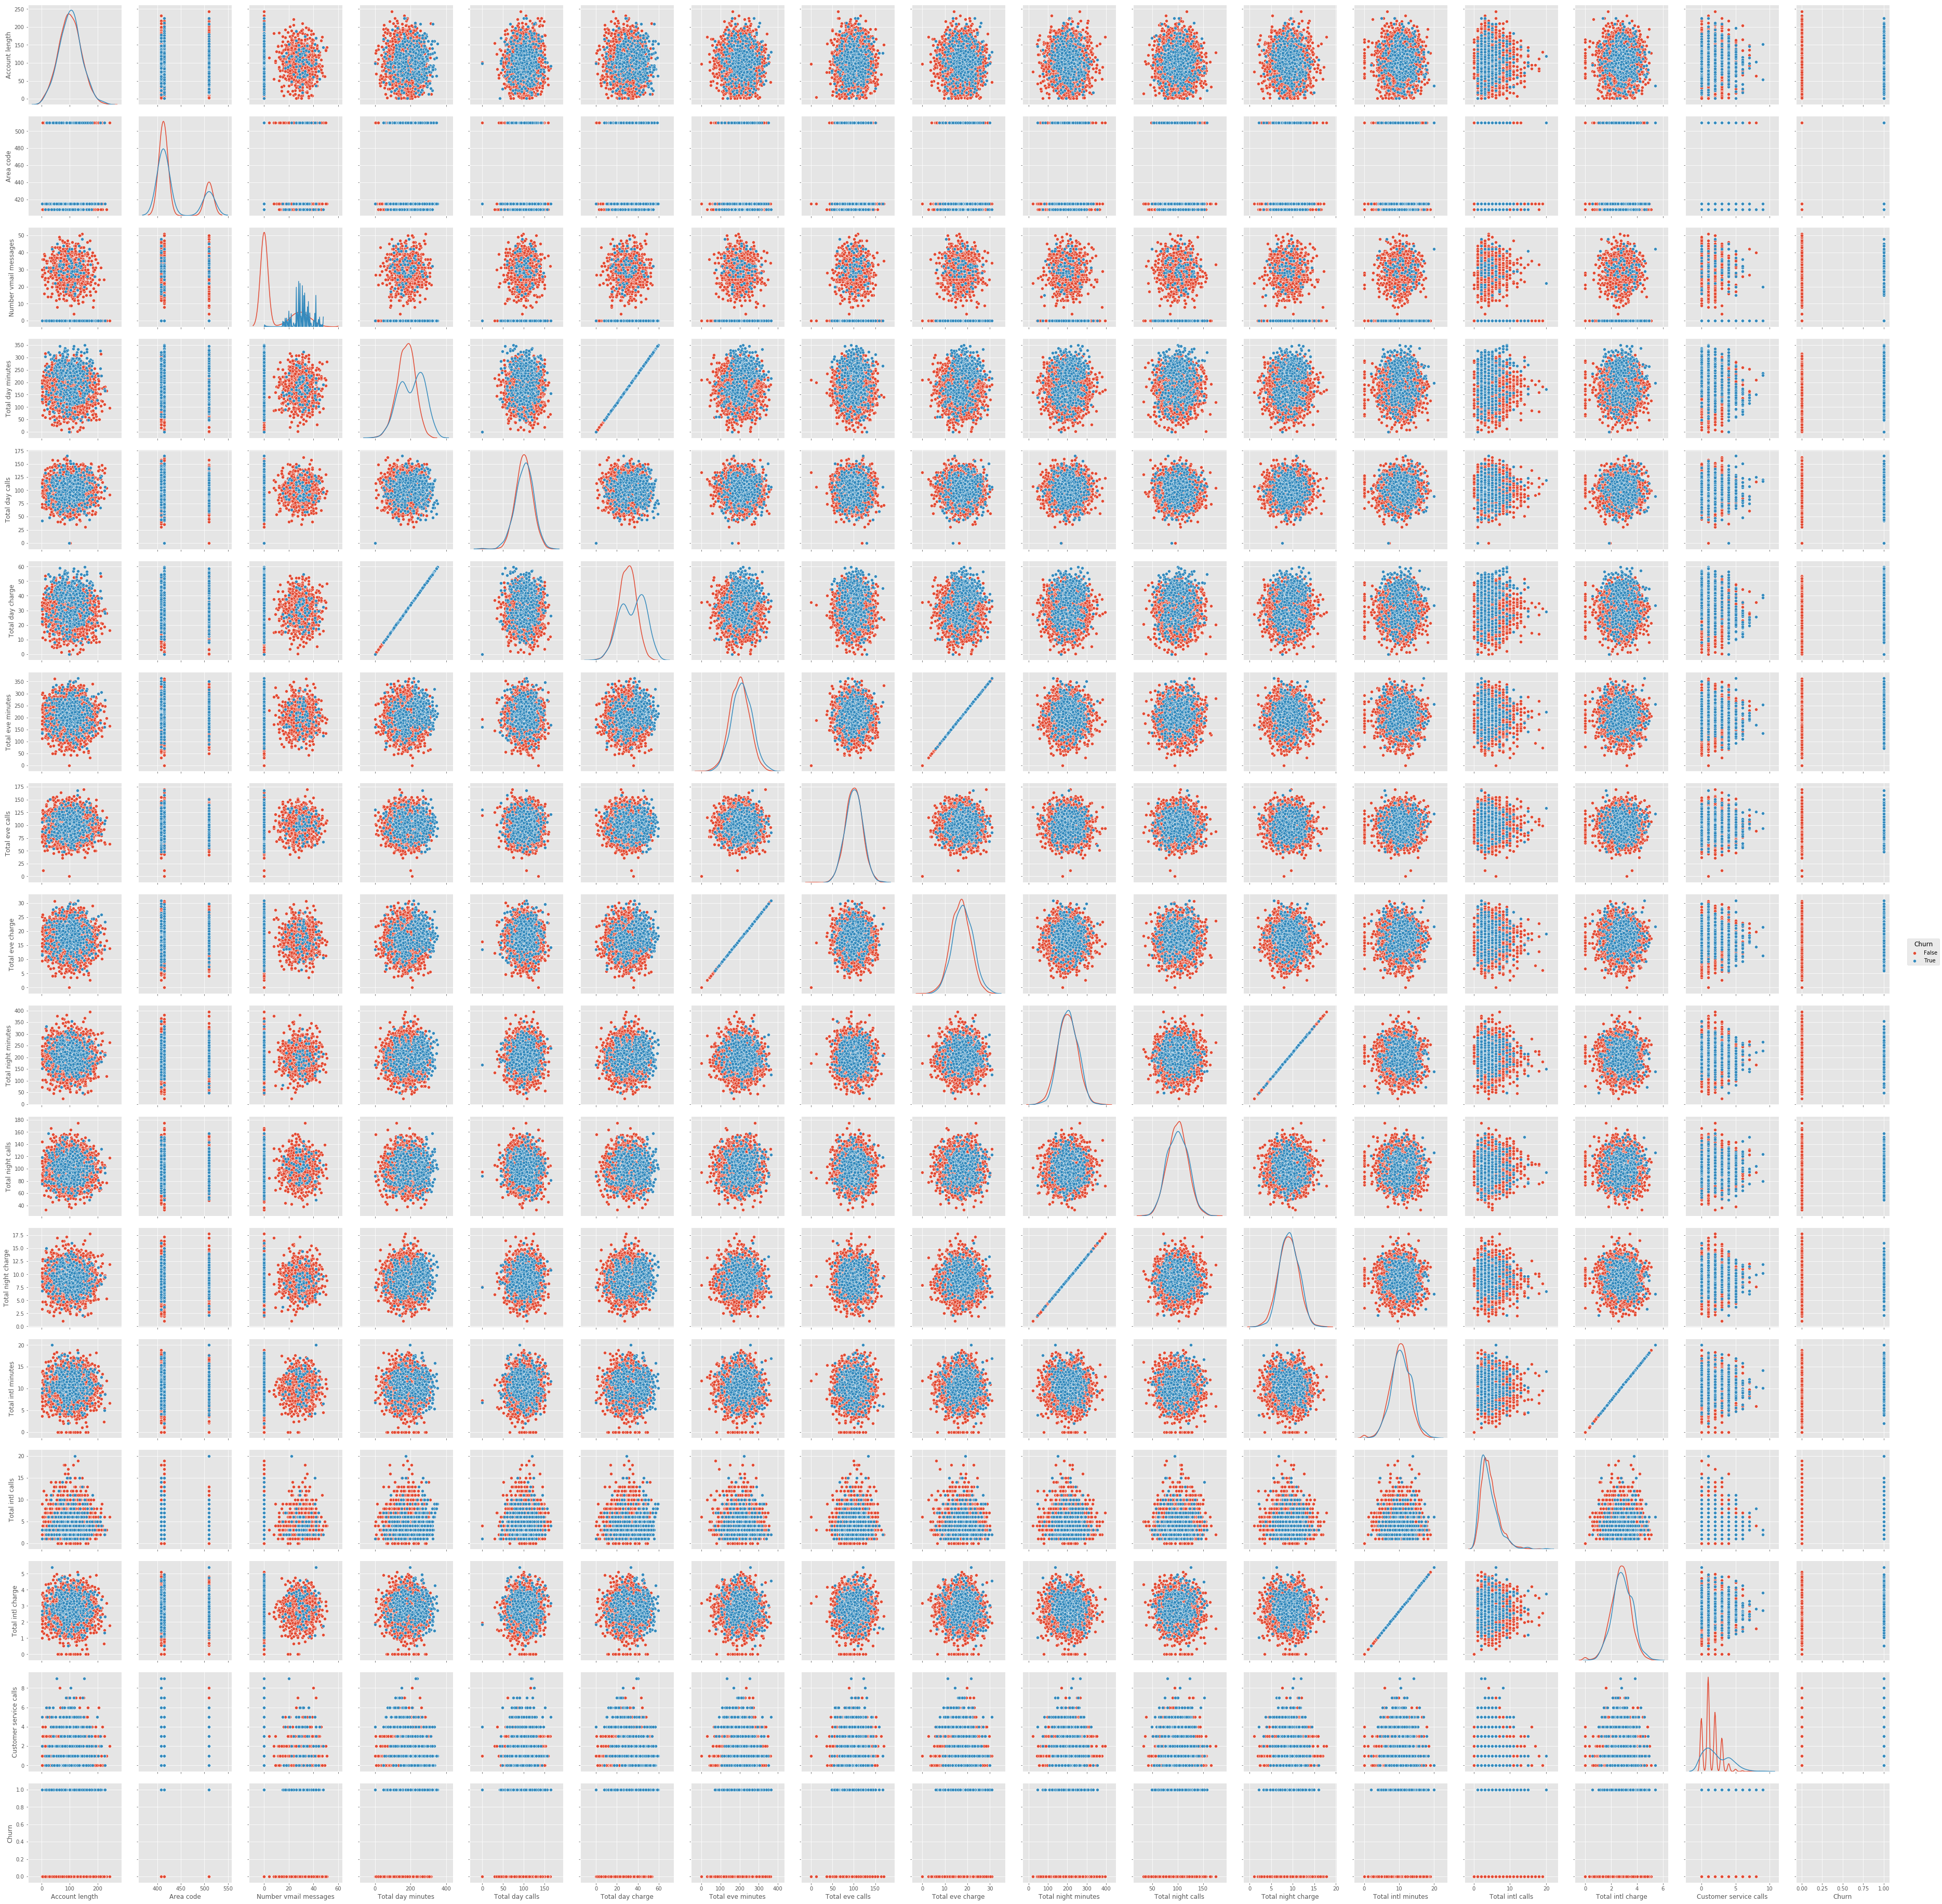

In [17]:
sns.pairplot(datanum, hue="Churn", diag_kind="kde", size=3)


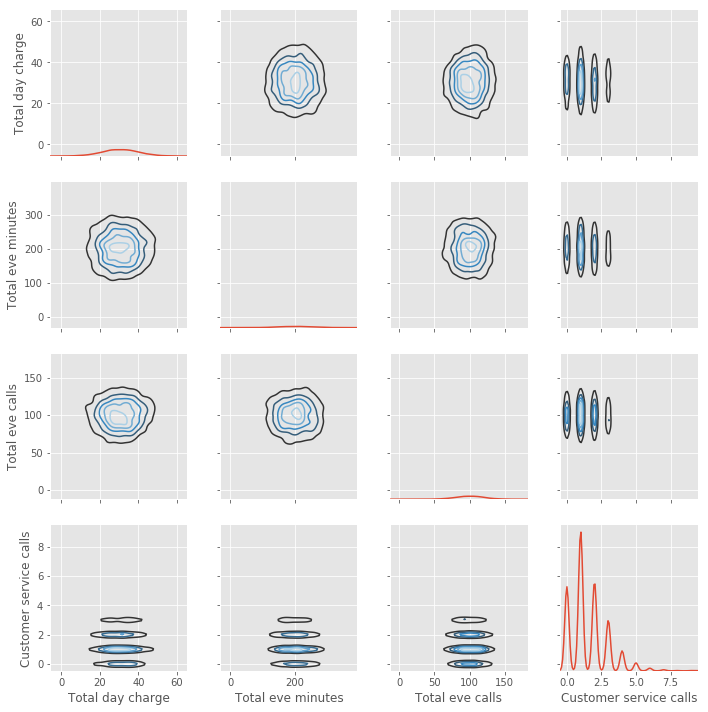

In [16]:
g = sns.PairGrid(datanum, vars=["Total day charge","Total eve minutes","Total eve calls","Customer service calls"])
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=5);

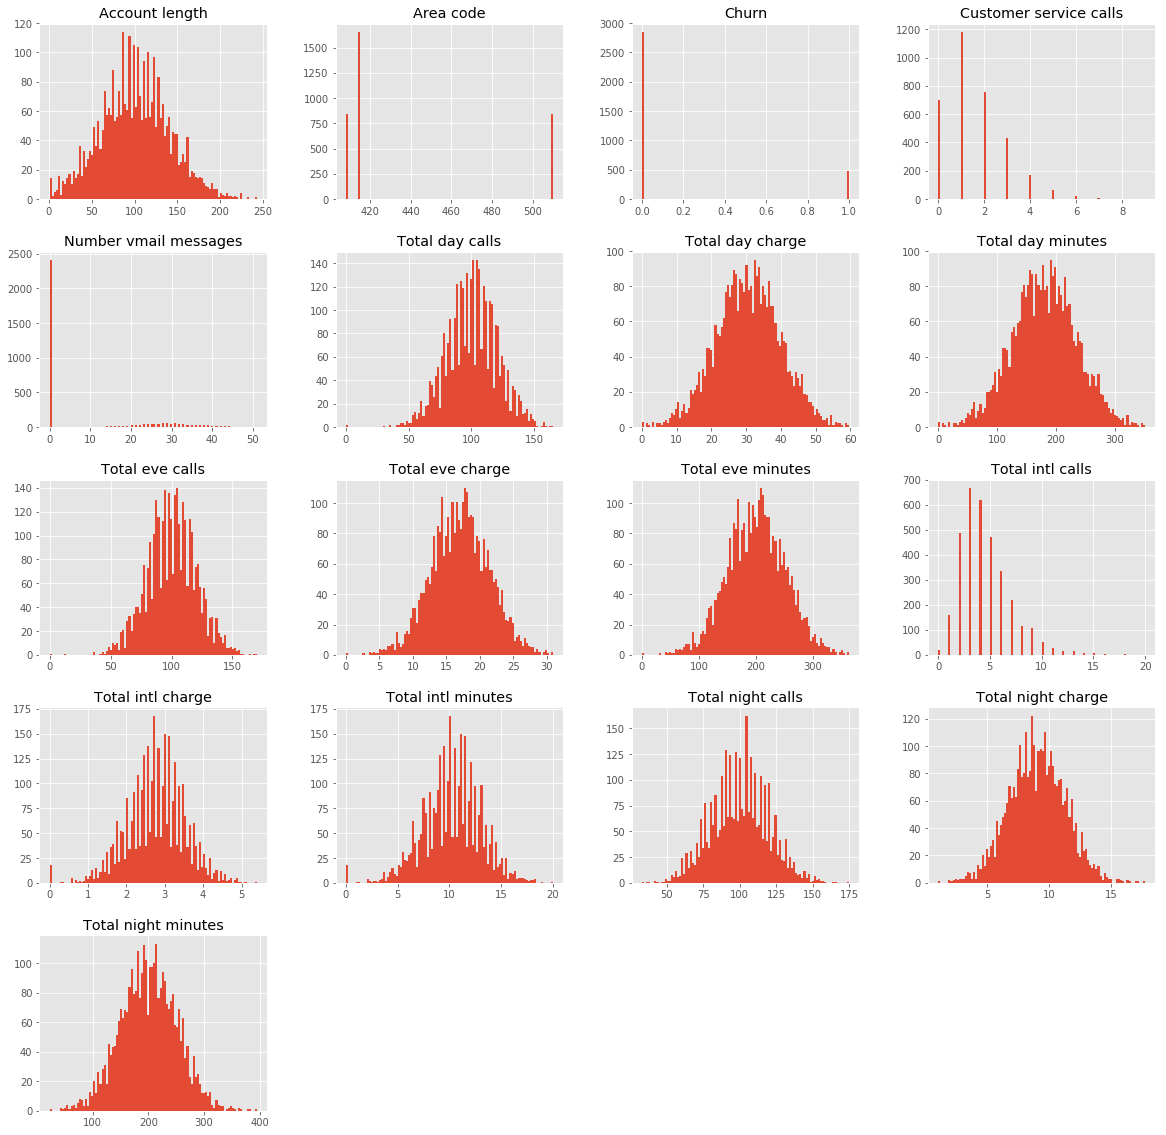

In [33]:
datanum.hist(figsize=(20, 20), bins=100);

In [25]:
corr_matrix = data.drop(['State', 'International plan', 'Voice mail plan',
                      'Area code'], axis=1).corr()

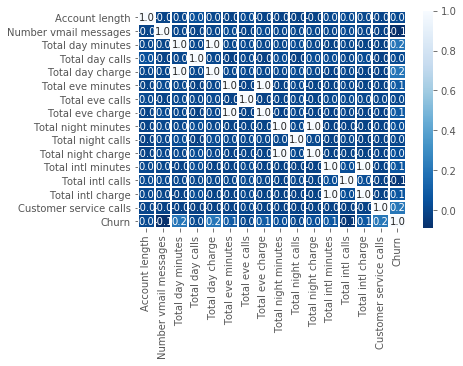

In [28]:
plt.xlabel('helix 2 phase', size = 15)
plt.ylabel('helix1 phase', size = 15)
sns.heatmap(corr_matrix, annot=True, fmt=".01f", linewidths=.9,  cmap="Blues_r")

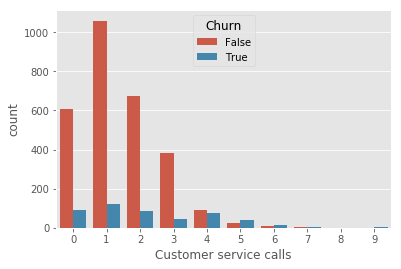

In [43]:
sns.countplot(x='Customer service calls', hue='Churn', data=data);

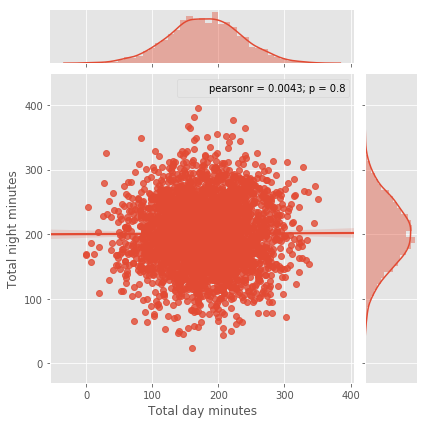

In [9]:
sns.jointplot(x='Total day minutes', y='Total night minutes',
              data=data, kind='reg');

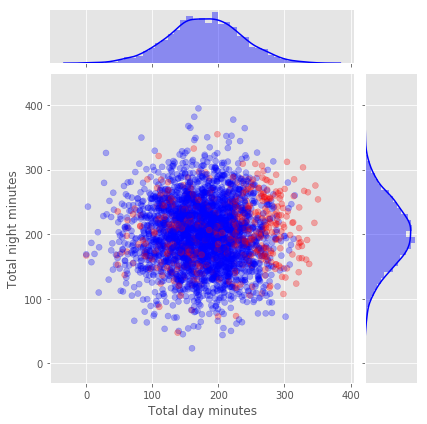

In [23]:
g=sns.JointGrid(x='Total day minutes', y='Total night minutes',
              data=data)
g = g.plot_joint(plt.scatter, color=data.iloc[:,-1].map({0: 'blue', 1: 'red'}), alpha=0.3 )
g = g.plot_marginals(sns.distplot, kde=True, color="blue")

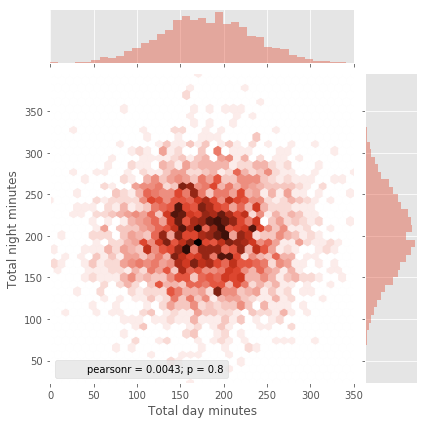

In [51]:
sns.jointplot(x='Total day minutes', y='Total night minutes',
              data=data, kind='hex');

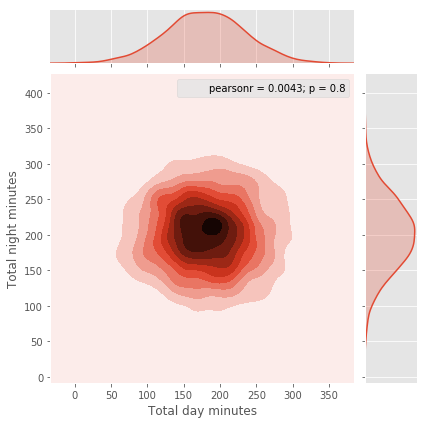

In [52]:
sns.jointplot(x='Total day minutes', y='Total night minutes',
              data=data, kind='kde');

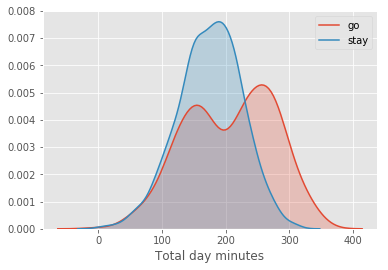

In [59]:
sns.kdeplot(data["Total day minutes"][data.Churn==1], label='go', shade=True)
sns.kdeplot(data["Total day minutes"][data.Churn==0], label='stay', shade=True)
plt.xlabel('Total day minutes');

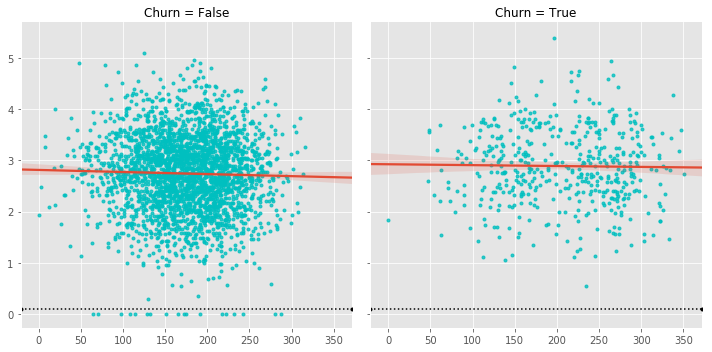

In [61]:
g = sns.lmplot('Total day minutes', 'Total intl charge', col='Churn', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

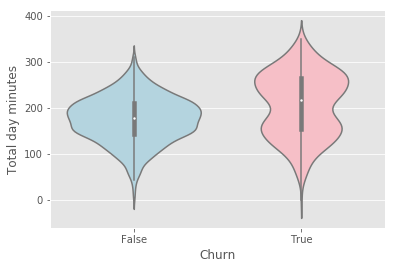

In [12]:
sns.violinplot("Churn", "Total day minutes", data=data,
               palette=["lightblue", "lightpink"]);

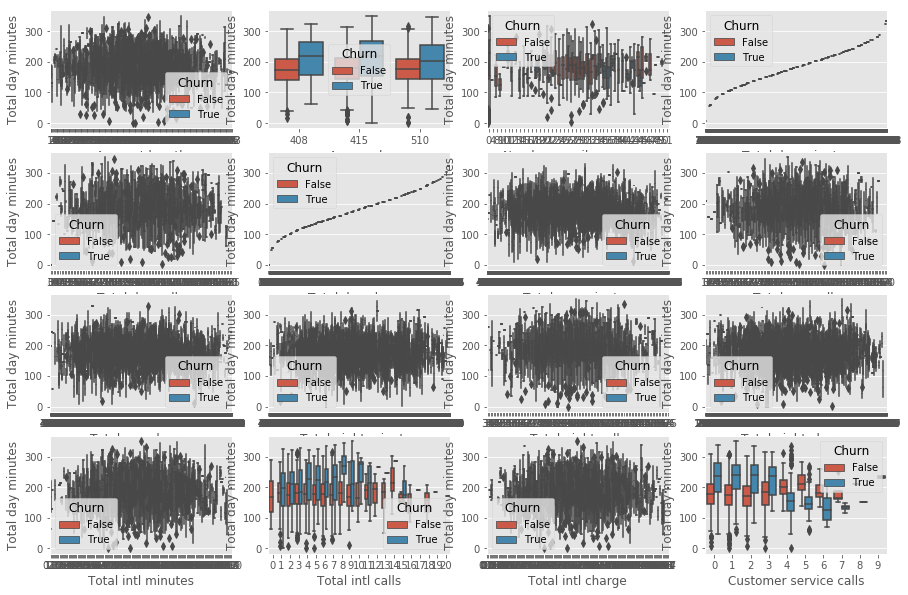

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))
for idx, featu in enumerate(datanum.columns[:-1]):
   sns.boxplot(featu, "Total day minutes",data=data, hue="Churn", ax=axes[idx / 4, idx % 4])